In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
Data = pd.read_csv('Faellesdata.csv')
DataFinal = Data.drop([
        'rsph', 'x', 'y', 'vx', 'vy', 'rsph_form', 'x_form', 
        'y_form', 'z_form', 'vx_form', 'vy_form',
        'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form'
       ], axis = 1)

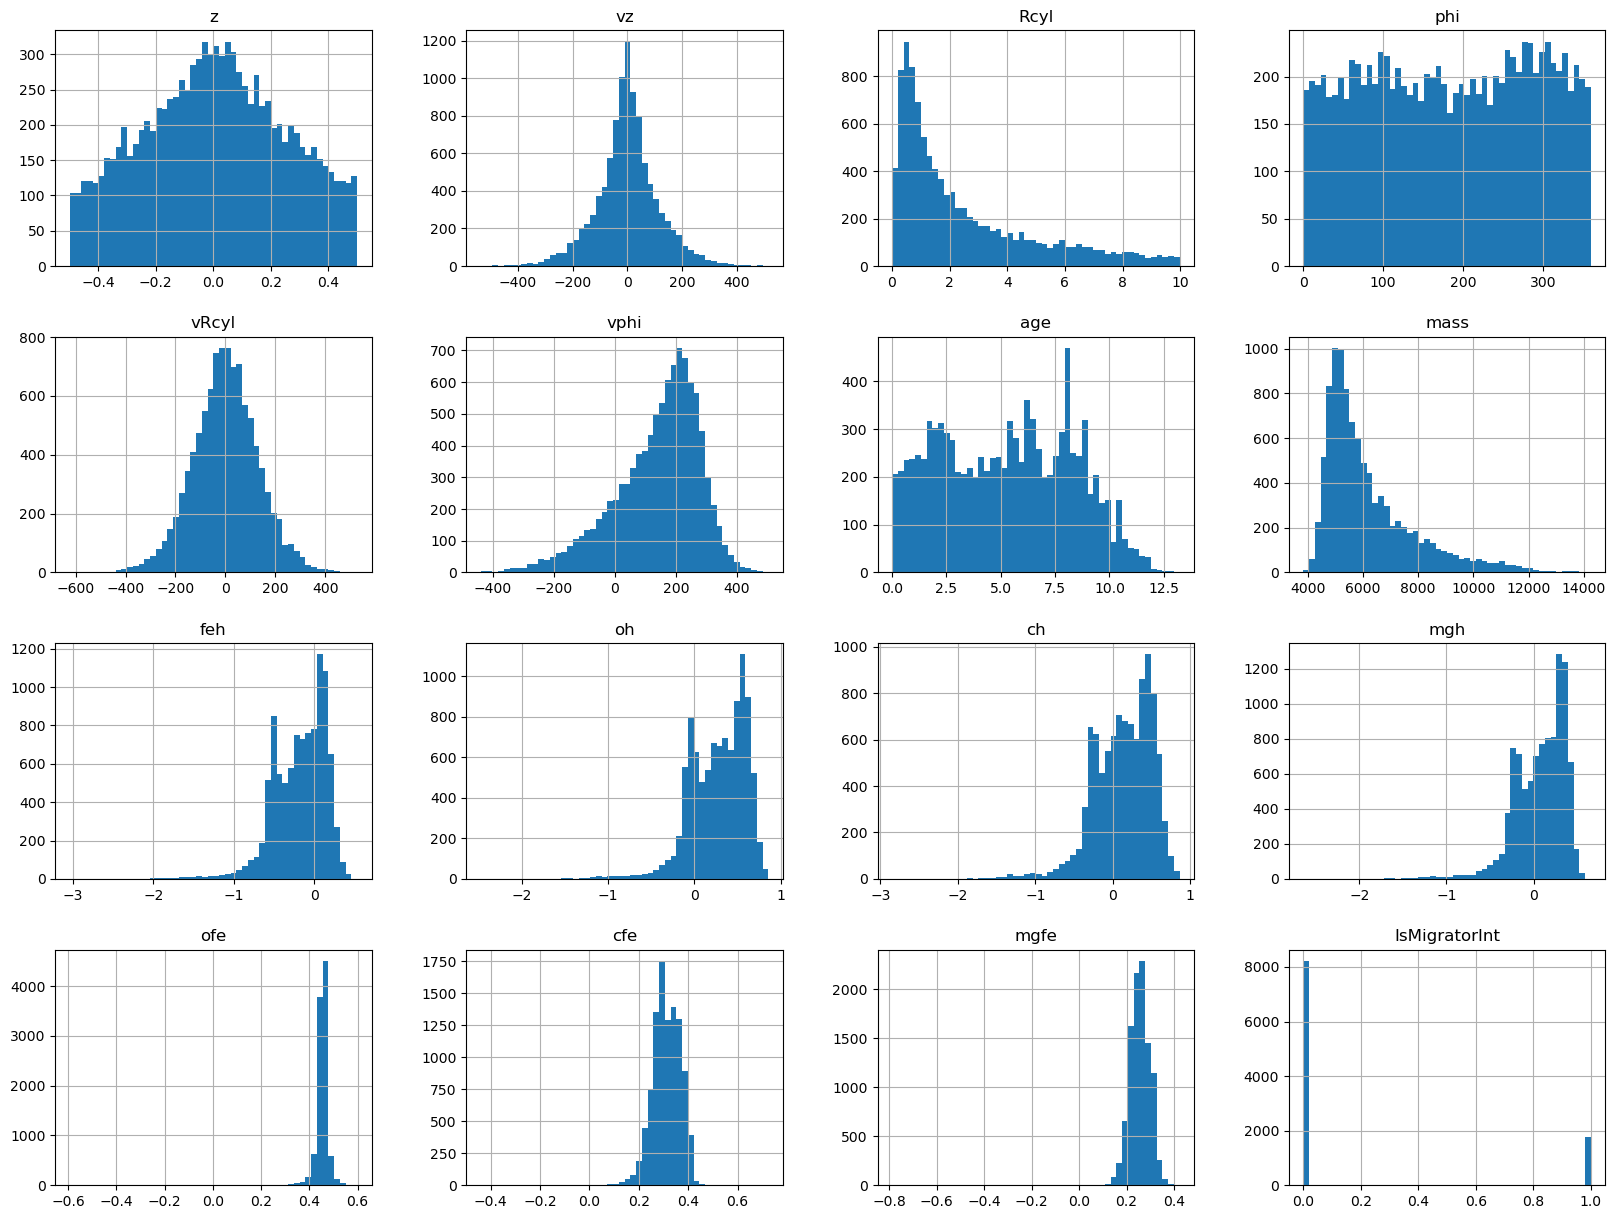

In [ ]:
DataFinal.hist(bins = 50, figsize = (20, 15));
#plt.savefig("Histograms")

In [14]:
import statsmodels.api as sm
import time
import itertools
from ISLP.models import (ModelSpec as MS,
                         summarize, poly)

In [15]:
DataFinal.iloc[:,:-2]

,z,vz,Rcyl,phi,vRcyl,vphi,age,mass,feh,oh,ch,mgh,ofe,cfe,mgfe
0,0.361,-92.909,1.236,341.267,-82.221,166.156,6.961,6600.002,-0.253,0.194,0.053,0.026,0.448,0.306,0.279
1,-0.162,24.089,1.525,300.646,42.443,257.005,1.891,5529.467,0.141,0.610,0.520,0.366,0.470,0.379,0.225
2,-0.369,-21.360,6.925,162.806,-85.396,283.916,0.963,8819.483,0.046,0.517,0.400,0.283,0.471,0.355,0.238
3,-0.330,-26.248,5.832,0.303,175.200,128.138,1.231,6918.149,0.129,0.596,0.503,0.351,0.466,0.374,0.222
4,-0.243,304.173,0.292,13.944,286.408,-28.238,8.985,6125.553,-0.536,-0.069,-0.262,-0.230,0.467,0.274,0.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.123,22.456,0.705,307.465,12.126,179.076,5.120,10796.726,0.048,0.485,0.393,0.278,0.437,0.344,0.230
9996,0.024,-202.398,0.552,190.765,-15.763,-78.668,8.986,5159.025,-0.524,-0.061,-0.224,-0.221,0.463,0.300,0.304
9997,-0.151,-87.273,2.180,95.685,-217.565,75.266,8.757,4770.375,-0.543,-0.058,-0.271,-0.220,0.485,0.272,0.323
9998,-0.056,-104.503,0.356,211.362,-170.438,-44.733,5.870,5257.479,-0.085,0.356,0.227,0.170,0.442,0.312,0.255


In [16]:
# Found on google
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X = MS(list(feature_set)).fit_transform(DataFinal[list(feature_set)])
    model = sm.GLM(
        DataFinal["IsMigratorInt"]
        , X
        , family = sm.families.Binomial()
        )
    regr = model.fit()
    TErate = np.mean((regr.predict(X) >= 0.5) != DataFinal['IsMigratorInt'])
    return {"model": regr, "TErate": TErate}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(DataFinal.iloc[:,:-2], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['TErate'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["TErate", "model"])

tic = time.time()
for i in range(len(DataFinal.iloc[:,:-2].columns) + 1):
    models_best.loc[i] = getBest(i)
 
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.04330587387084961 seconds.
Processed 15 models on 1 predictors in 0.20767474174499512 seconds.
Processed 105 models on 2 predictors in 1.312762975692749 seconds.
Processed 455 models on 3 predictors in 7.745789289474487 seconds.
Processed 1365 models on 4 predictors in 17.60928988456726 seconds.
Processed 3003 models on 5 predictors in 57.52135705947876 seconds.
Processed 5005 models on 6 predictors in 87.01870894432068 seconds.
Processed 6435 models on 7 predictors in 135.03643584251404 seconds.
Processed 6435 models on 8 predictors in 322.076149225235 seconds.
Processed 5005 models on 9 predictors in 318.3004651069641 seconds.
Processed 3003 models on 10 predictors in 185.82167196273804 seconds.
Processed 1365 models on 11 predictors in 45.35411190986633 seconds.
Processed 455 models on 12 predictors in 16.138192176818848 seconds.
Processed 105 models on 13 predictors in 4.0824480056762695 seconds.
Processed 15 models on 14 predictors in 0.7096

In [20]:
i = 15
models_best.loc[i] = getBest(i)

Processed 1 models on 15 predictors in 0.11770176887512207 seconds.


In [21]:
models_best.apply(lambda row: row[1].params, axis=1) # get the parameters of the best model for each number of predictors


,Rcyl,age,cfe,ch,feh,intercept,mass,mgfe,mgh,ofe,oh,phi,vRcyl,vphi,vz,z
0,NaN,NaN,NaN,NaN,NaN,-1.533378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.475677,NaN,NaN,NaN,NaN,-3.076232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.453408,NaN,NaN,NaN,NaN,-3.406676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002375,NaN,NaN
3,0.475344,NaN,NaN,-1.271478,NaN,-3.620855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004132,NaN,NaN
4,0.491831,0.132953,NaN,NaN,NaN,-7.693903,NaN,NaN,NaN,6.999161,NaN,NaN,NaN,0.004081,NaN,NaN
5,0.414372,-0.249256,-13.146076,NaN,NaN,-1.840353,NaN,14.279947,NaN,NaN,NaN,NaN,NaN,0.003340,NaN,NaN
6,0.414764,-0.246641,-13.077175,NaN,NaN,-2.014243,NaN,14.269301,NaN,NaN,NaN,0.000739,NaN,0.003365,NaN,NaN
7,0.415518,-0.251704,-13.049131,NaN,NaN,-1.830725,-0.000023,14.181474,NaN,NaN,NaN,0.000736,NaN,0.003363,NaN,NaN
8,0.415470,-0.251828,-13.054046,NaN,NaN,-1.829841,-0.000023,14.185548,NaN,NaN,NaN,0.000737,-4.697928e-05,0.003364,NaN,NaN
9,0.415413,-0.260820,-12.906423,NaN,NaN,-1.518493,-0.000022,15.395771,NaN,-1.371342,NaN,0.000734,-4.721830e-05,0.003343,NaN,NaN
